In [36]:
import numpy as np
import matplotlib.pyplot as plt

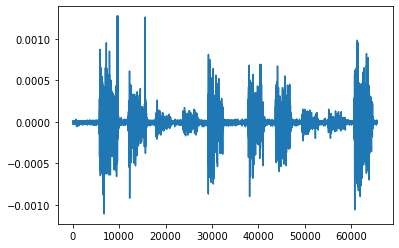

In [189]:
#sacar datos de prueba
import os #Hacer codigo para leerlos todos
ruta=os.getcwd()
archivo_prueba=os.listdir(ruta+'/EMG_data_for_gestures-master/01')
#archivo_prueba[0]
data=np.loadtxt(ruta+'/EMG_data_for_gestures-master/01/'+archivo_prueba[0],skiprows=1,delimiter='\t')
t=data[:,0]
channel_1=data[:,1]
plt.plot(t,channel_1)

In [178]:
def tkeo(data): 
    x=data*1
    x[1:-1]=np.square(x[1:-1])-np.multiply(x[0:-2],x[2:]) #aplica la función para todos los datos menos el primero y el último, que no es un problema (describir en análisis)
    return x

In [179]:
def tkeo2(x): #como la anterior pero últimos valores invertidos
    xn_squared=np.hstack((np.zeros(1),np.square(x),np.zeros(1))) #x(n)^2
    xn1=np.hstack((x,np.ones(2))) #x(n+1)
    xn2=np.hstack((np.ones(2),x)) #x(n-1)
    tkeo=xn_squared-np.multiply(xn1,xn2)
    return tkeo[1:-1]

(1.0, 65661.0, -1.5053e-06, 2.1328e-06)

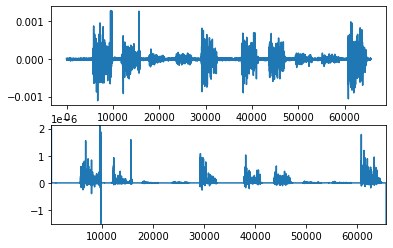

In [190]:
tkeo_channel_1=tkeo(channel_1)
plt.subplot(211)
plt.plot(t,channel_1)
plt.subplot(212)
plt.plot(t,tkeo_channel_1)
plt.axis([t[0],t[-1],np.min(tkeo_channel_1[1:-1]),np.max(tkeo_channel_1[1:-1])])